In [1]:
import numpy as np 
from nfvm.mesh.triangleMesh import TriangleMesh
from nfvm.field.volField import volScalarField
import nfvm.fvm as fvm

import matplotlib.pyplot as plt

# 少数三角网格上的算例

## 加载点和控制体

重构网格拓扑关系 ...
重构网格拓扑关系 成功
初始化 TriangleMesh ...
初始化 TriangleMesh 成功


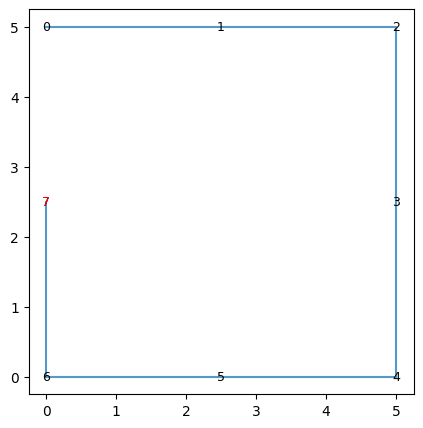

In [2]:
points = np.loadtxt("../../resources/mesh/tri14/points.txt", delimiter=',')
cells = np.loadtxt("../../resources/mesh/tri14/cells.txt", dtype=int, delimiter=',')

mesh = TriangleMesh.points8cells(points, cells)
mesh.boundary.resort([1])
mesh.showBoundary(pause=False)

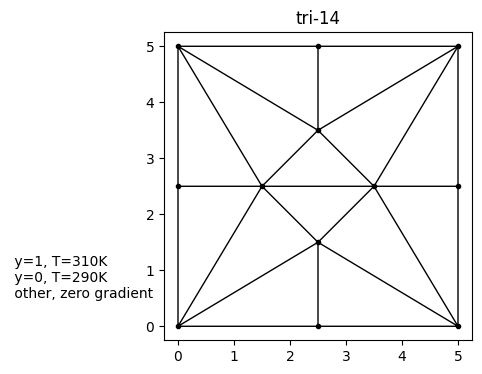

In [3]:
# 网格可视化

X = mesh.points[:,0]
Y = mesh.points[:,1]
triangles = mesh.cells 

fig, ax = plt.subplots(figsize=(6,4))
ax.set_aspect('equal')
tpc = ax.triplot(X, Y, triangles, 'ko-', markersize=3, lw=1.0)
ax.set_title('tri-14')

ax.text(-3,0.5, " y=1, T=310K\n y=0, T=290K\n other, zero gradient")

plt.show()

## 构造一个温度场

In [4]:
# 构造一个边界条, 默认的 k=1.0, b=0.0就是0梯度
k, b = np.ones(8), np.zeros(8)

# 0-2温度为310 
k[0:2] = 0.0
b[0:2] = 310.0
# 4-6温度为300，
k[4:6] = 0.0
b[4:6] = 290.0

In [5]:
# 构造一个温度场并指定初始值

CN = mesh.cn
T = volScalarField("T", mesh, value=np.ones(CN)*300.0, boundary_dict={'k': k, 'b': b})

## 使用拉普拉斯算子构造稀疏矩阵

In [6]:
mat = fvm.Laplacian(T)

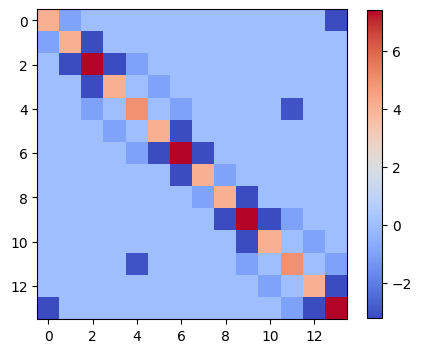

In [7]:
# 可视化稀疏矩阵
plt.figure(figsize=(5,5))

plt.imshow(mat.csr.todense(), cmap='coolwarm')
plt.colorbar(shrink=0.8)
# plt.savefig('sp-mat-tri14.png', dpi=150, bbox_inches='tight')

## 求解稀疏矩阵

使用`scipy.sparse.linalg`模块的`spsolve`函数求解稀疏矩阵。

In [8]:
x = mat.solve()

In [9]:
# 将计算结果写出到文件中

T.value = x
# T.writeVTK()

## 可视化

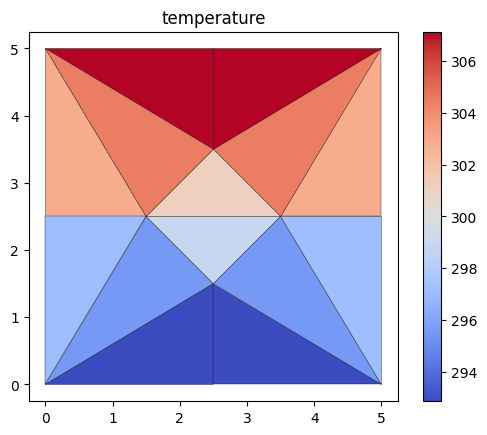

In [10]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
tpc = ax.tripcolor(X, Y, triangles, facecolors=T.value, cmap='coolwarm', edgecolors='k')
fig.colorbar(tpc)
ax.set_title('temperature')
# plt.savefig('temperature-tri14.png', dpi=150, bbox_inches='tight')
plt.show()